In [60]:
# Import necessary packages
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
#Function that will scrape a wikipedia page with a list of movies by year, add the year as a new column and return 
# a data frame.

def get_table_after_1996(year):
    #create the url 
    url = 'http://en.wikipedia.org/wiki/List_of_American_films_of_'+ str(year)
    html = urlopen(url) 
    soup = BeautifulSoup(html, 'html.parser')
    website_url = requests.get(url).text 
    soup = BeautifulSoup(website_url, 'lxml')
    My_table = soup.find('table',{'class':'wikitable sortable'})
    titles = []
    directors = []
    actors = []
    genres = []
    rows = My_table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells)>=1:
            title = cells[0]
            titles.append(title.text)
            director = cells[1]
            directors.append(director.text)
            actor = cells[2]
            actors.append(actor.text)
            genre = cells[3]
            genres.append(genre.text)
            index = [*range(1,len(titles)+1,1)]
            df = pd.DataFrame({'Titles': titles,'Directors' : directors, 'Actors': actors, 'Genres': genres, }, index = index   )
            years = [year]*len(df)
            df['Year'] = years
    return df


In [62]:
df = get_table_after_1996(1999)
df.head()

,Titles,Directors,Actors,Genres,Year
1,10 Things I Hate About You,Gil Junger,"Julia Stiles, Heath Ledger, Larisa Oleynik, Jo...",Romantic comedy,1999
2,The 13th Warrior,John McTiernan,"Antonio Banderas, Diane Venora, Vladimir Kulic...",Action,1999
3,200 Cigarettes,Risa Bramon Garcia,"Ben Affleck, Casey Affleck, Dave Chappelle, Gu...","Comedy, Drama",1999
4,The 4th Floor,Josh Klausner,"Juliette Lewis, William Hurt, Shelley Duvall",Horror,1999
5,8mm,Joel Schumacher,"Nicolas Cage, Joaquin Phoenix, James Gandolfin...",Thriller,1999


In [96]:
#
df_1999 = get_table_after_1996(1999)
#create a list with all the movie genres
list_of_genres = ['children', 'fantasy', 'magical', 'mystery', 'action', 'crime', 'drama', 'science fiction', 'adventure', 'biography', 'comedy', 'thriller', 'musical', 'western', 'romance', 'animation', 'war', 'horror', 'sport', 'political', 'saga', ' satire', 'social']
len(list_of_genres)
#create a dictionary that will give war grades by genre
war_grades = {'children':0, 'fantasy':3, 'magical':3, 'mystery':4, 'action':7, 'crime':8, 'drama':7, 'SF':5, 'adventure': 4, 'biography':5, 'comedy':4, 'thriller':4, 'musical':4, 'western':8, 'romance': 2, 'war':10, 'horror':4, 'sport':3, 'political':6, 'saga':3, 'satire':2, 'social':4, 'animation':2}
len(war_grades)

23

In [64]:
#create a list with all the genres from the "Genres" column and lower the case of each element
list_1999 = df['Genres'].to_list()
list_1999
lower_list = [x.lower() for x in list_1999]



In [79]:
#separate the genres where a movie has two or more genres
list = [x.split() for x in lower_list]
list_year = []
for sublist in list:
    for item in sublist:
        list_year.append(item)   


In [103]:
#some genres have comma attached, take off comma
list_year_no_comma = []
for item in list_year:
    if ',' in item:
        list_year_no_comma.append(item[:-1])
    else:
        list_year_no_comma.append(item)
print(list_year_no_comma)

        


SyntaxError: invalid syntax (<ipython-input-103-0469810fc880>, line 9)

In [67]:
# Create a dictionary
word_counts = {}
# Iterate through the text of Macbeth
for genre in list_year_no_comma:
    # Update word counts
    word_counts[genre] = word_counts.get(genre, 0) + 1 #Get previous entry, update by 1

In [78]:
print(word_counts)
len(word_counts)

{'romantic': 16, 'comedy': 74, 'action': 16, 'drama': 64, 'horror': 19, 'thriller': 15, "children's": 1, 'film': 1, 'documentary': 4, 'family': 9, 'animation': 7, 'musical': 2, 'sports': 3, 'science': 9, 'fiction': 9, 'romance': 3, 'fantasy': 1, 'crime': 14, 'mockumentary': 3, 'biopic': 5, 'animated': 4, 'action-comedy': 1, 'comedy,horro': 1, 'shakespearean': 2, 'superhero': 1, 'war': 2, 'teen': 1, 'biography': 1, 'suspense': 1, 'space': 1, 'opera': 1, 'independent': 1, 'spy': 1}


33

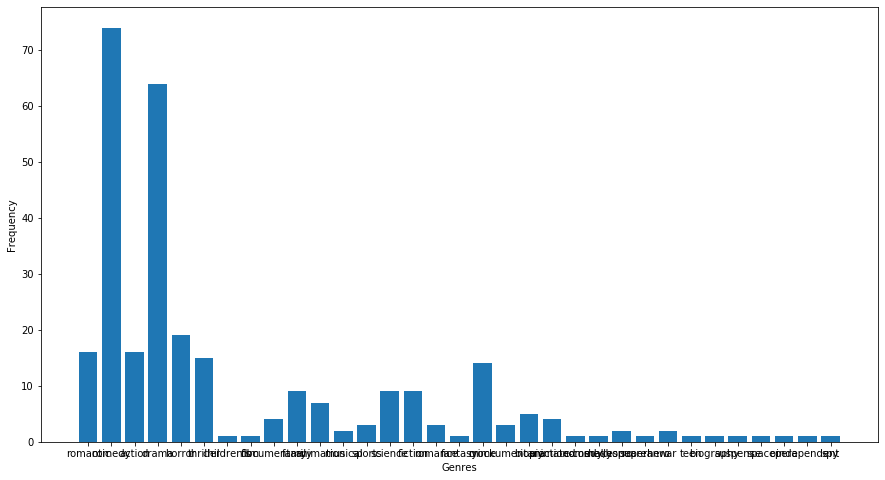

In [77]:
y_values_all=[]
x_values_all=[]
for k,v in word_counts.items():
    y_values_all.append(v)
    x_values_all.append(k)
plt.figure(figsize=(15,8))    
plt.bar(x_values_all, y_values_all, label="1999")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()

In [97]:
#turn dictionary into df
df_to_plot = pd.DataFrame(word_counts.items(), columns=['Genres', 'year_1999'])
df_to_plot

,Genres,year_1999
0,romantic,16
1,comedy,74
2,action,16
3,drama,64
4,horror,19
5,thriller,15
6,children's,1
7,film,1
8,documentary,4
9,family,9


In [81]:
df_to_plot.plot(kind='scatter', x:df_to_plot['Genres'], y:df_to_plot['year_1999'])

SyntaxError: invalid syntax (<ipython-input-81-5d8ef1a511ac>, line 1)

In [83]:
#sns.set(df_to_plot=True)

#lmplot = sns.boxplot(data = df_to_plot)
#sns.lmplot(x = 'Genre', y = 'Occurences')
#lmplot.set(xlabel='Genres', ylabel='Occurences', title='1999_in movie')


Text(0.5, 1.0, 'Genres 1999')

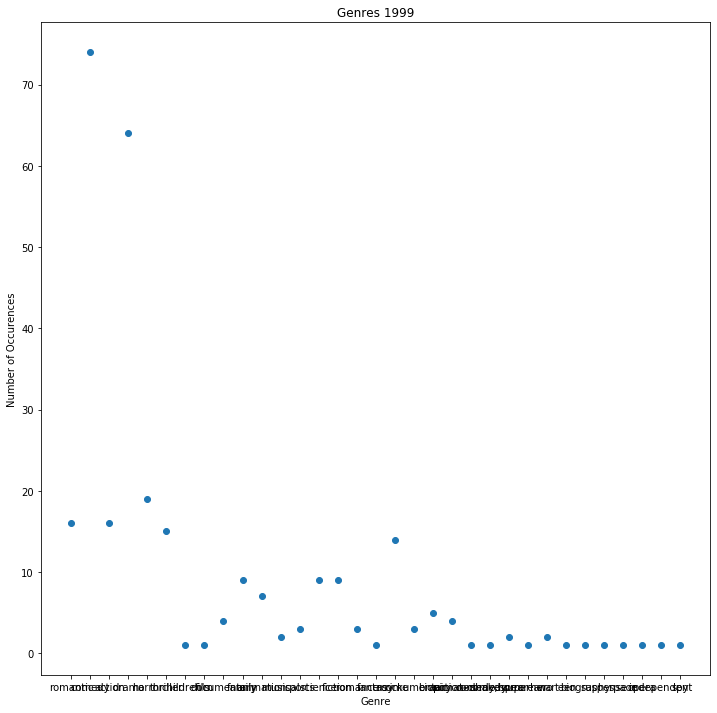

In [94]:
X = word_counts.keys()
Y = word_counts.values()
plt.figure(figsize=(12,12))
#Create Bar Graph
plt.scatter(X , Y)
# Include descriptive titles and labels
plt.ylabel('Number of Occurences')
plt.xlabel('Genre')
plt.title('Genres 1999')


In [99]:
pieces = []
for year in [*range(1999,2002,1)]:
    url = 'http://en.wikipedia.org/wiki/List_of_American_films_of_'+ str(year)
    df = get_table_after_1996(year)
    pieces.append(df)
df_all_b2001 = pd.concat(pieces)

In [101]:
df_by_genre = df_all_b2001.groupby(['Year', 'Genres']).count().drop(['Directors', 'Actors'], axis=1)
df_by_genre

Titles
Year Genres                
1999                      1
     Action              10
     Action Comedy        1
     Action comedy        1
     Action, Comedy       3
...                     ...
2001 Thriller            14
     War                  5
     War drama            1
     Western              1
     parody               1

[126 rows x 1 columns]